# Exploring county level data

### Prep code

In [51]:
# %pip install pandas
# %pip install openpyxl
# %pip install matplotlib
# %pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


### Retrieve "export.csv" resulting from "base_code.R"

In [52]:
# data = pd.read_excel('../unzipped_shp_and_shx_shape_files/cleaned_export.xlsx', na_values=".")
data = pd.read_csv('../unzipped_shp_and_shx_shape_files/export.csv', na_values=".")

In [53]:
# data2 = data[['fips', 'population', 'intersects_per_road_length', 'road_length_per_intersect', 'population_density']]
# data2

### Plot "intersects_per_road_length" data

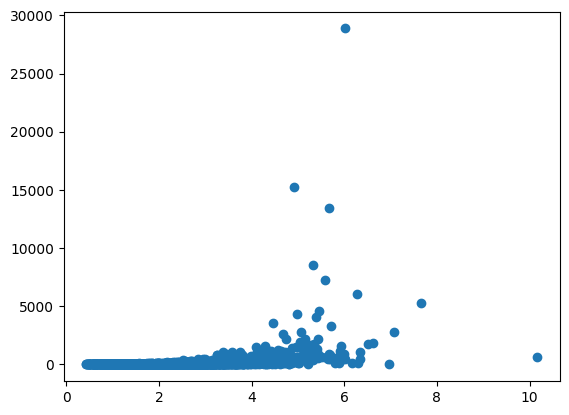

In [54]:
# Generate data...
x = data['intersects_per_road_length']
y = data['population_density']
c = data['population']
# Plot...
plt.scatter(x, y)
plt.gray()

plt.show()

### Draw linear regression line for "intersects_per_road_length" plot graph

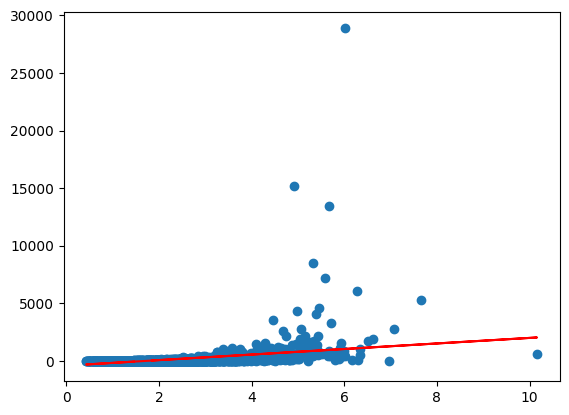

In [55]:
stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here

# plt.savefig("figure.png")

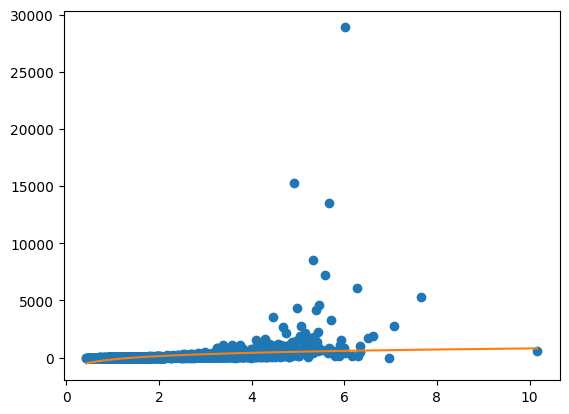

In [56]:
from scipy.optimize import curve_fit

plt.plot(x,y,'o')

# x = np.array(xdata, dtype=float) #transform your data in a numpy array of floats 
# y = np.array(ydata, dtype=float) #so the curve_fit can work

#def func(x,a,b,c):
#    return a*x**2+ b*x +c

def func(x,a,b):
    return a*np.log(x)+ b

popt, pcov = curve_fit(func, x, y)
x_sorted = np.sort(x)
plt.plot(x_sorted, func(x_sorted, *popt), label="Fitted Curve")
plt.show()

### Normalize data on a log scale and gradient the plot via population (darker = more population)

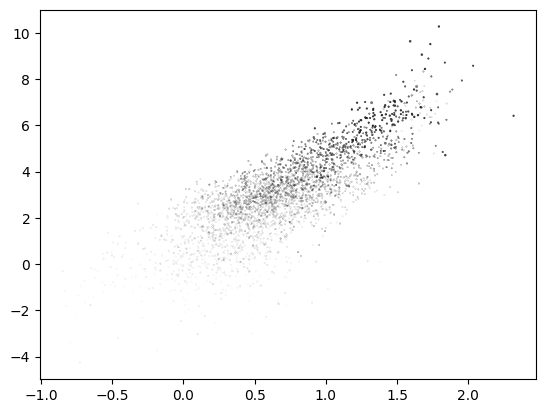

In [57]:
# Generate data...
x = data['intersects_per_road_length']
y = data['population_density']
c = data['population']
# Plot...
# plt.scatter(x, y, c=c, marker='x')

xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(xn, yn, c=c,s = c/1000000, marker='.',)


plt.show()

### Linear regression line for normalized data on a log scale

LinregressResult(slope=3.1843486009551687, intercept=0.7583561338884661, rvalue=0.7814573007739326, pvalue=0.0, stderr=0.045366705705999176, intercept_stderr=0.035642061509426344)


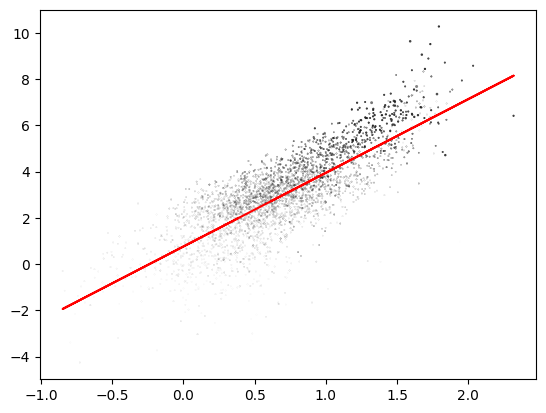

In [58]:
# Generate data...
x = data['intersects_per_road_length']
y = data['population_density']
c = data['population']
# Plot...
# plt.scatter(x, y, c=c, marker='x')

xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(xn, yn, c=c,s = c/1000000, marker='.',)
plt.plot(xn, m * xn + b, color="red")   # I've added a color argument here

print(stats)

plt.show()

### Inverse data by working with amount of uninterrupted road per intersect

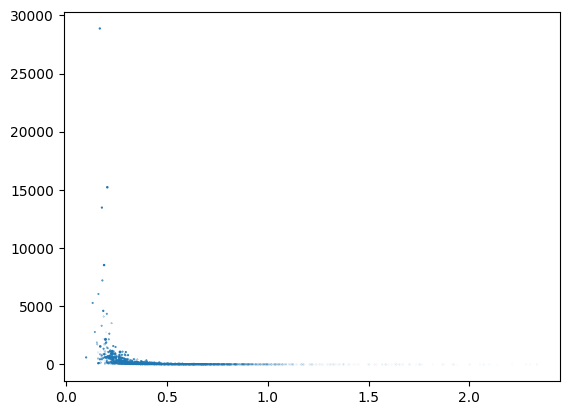

In [59]:
# calculate average road length per intersection per county

# Generate data...
x = data['road_length_per_intersect']
y = data['population_density']
c = data['population']


xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(x, y, s = c/1000000, marker='.',)


plt.show()

# this seems to indicate taht the shorter the road length is per intersect, the higher the population density
# but this is a given because this is the inverse of the road intersections per population density


### Normalized data for inverse data by working with amount of uninterrupted road per intersect

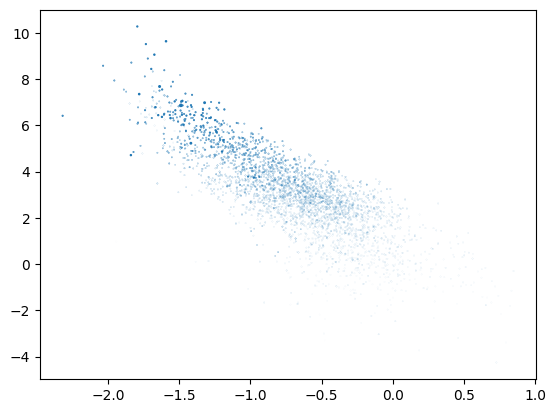

In [60]:
# calculate average road length per intersection per county

# Generate data...
x = data['road_length_per_intersect']
c = data['population']


xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(xn, yn, s = c/1000000, marker='.',)


plt.show()

### Random Forest Classifier

In [61]:
# data = pd.read_excel('../unzipped_shp_and_shx_shape_files/cleaned_export.xlsx', na_values=".")
df = pd.read_csv('../unzipped_shp_and_shx_shape_files/export.csv', na_values=".")
df.head()

,fips,county_zip_file_name,roads_length_m,intersections,countyname,population,state,county,area_land_sqm,area_water_sqm,...,est_51,naics_52,emp_52,est_52,area_land_sqkm,roads_length_km,intersects_per_road_length,road_length_per_intersect,population_density,intersects_per_population_density
0,1001,tl_2020_01001_roads.zip,2658136.223,4926,"Autauga County, Alabama",58805,1,1,1.539631e+09,2.567754e+07,...,11.0,52----,367.0,72.0,1539.631461,2658.136223,1.853178,0.539614,38.194205,70.780667
1,1003,tl_2020_01003_roads.zip,6818407.996,17393,"Baldwin County, Alabama",231767,1,3,4.117725e+09,1.132887e+09,...,99.0,52----,1695.0,373.0,4117.724893,6818.407996,2.550889,0.392020,56.285207,143.577301
2,1005,tl_2020_01005_roads.zip,2025010.112,2918,"Barbour County, Alabama",25223,1,5,2.292160e+09,5.052321e+07,...,10.0,52----,145.0,42.0,2292.160151,2025.010112,1.440980,0.693972,11.004030,15.856593
3,1007,tl_2020_01007_roads.zip,1957160.039,3039,"Bibb County, Alabama",22293,1,7,1.612189e+09,9.572302e+06,...,5.0,52----,63.0,16.0,1612.188713,1957.160039,1.552760,0.644014,13.827786,21.471234
4,1009,tl_2020_01009_roads.zip,2615906.457,4195,"Blount County, Alabama",59134,1,9,1.670259e+09,1.486028e+07,...,9.0,52----,215.0,48.0,1670.259093,2615.906457,1.603651,0.623577,35.404088,56.775788


In [62]:
df.columns

Index(['fips', 'county_zip_file_name', 'roads_length_m', 'intersections',
       'countyname', 'population', 'state', 'county', 'area_land_sqm',
       'area_water_sqm', 'fips_str', 'gdp_2020_usd2012value', 'state_fips',
       'county_fips', 'poverty_percentage', 'median_household_income',
       'pollutant_o3', 'naics_72251', 'emp_72251', 'est_72251', 'naics_813',
       'emp_813', 'est_813', 'naics_22', 'emp_22', 'est_22', 'naics_51',
       'emp_51', 'est_51', 'naics_52', 'emp_52', 'est_52', 'area_land_sqkm',
       'roads_length_km', 'intersects_per_road_length',
       'road_length_per_intersect', 'population_density',
       'intersects_per_population_density'],
      dtype='object')

In [63]:
df['log_intersects_per_road_length'] = np.log(data['intersects_per_road_length'])
df['log_population_density'] = np.log(data['population_density'])
df['log_intersects_per_population_density'] = np.log(data['intersects_per_population_density'])

<AxesSubplot: >

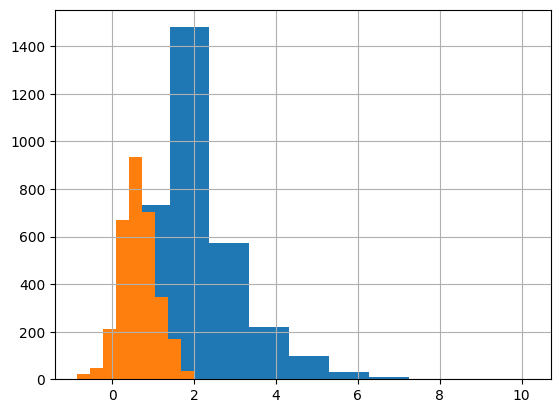

In [64]:
df['intersects_per_road_length'].hist()
df['log_intersects_per_road_length'].hist()


<AxesSubplot: >

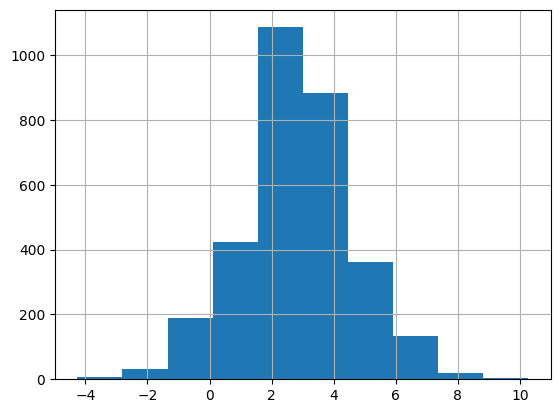

In [65]:
# df['population_density'].hist()
df['log_population_density'].hist()


<AxesSubplot: >

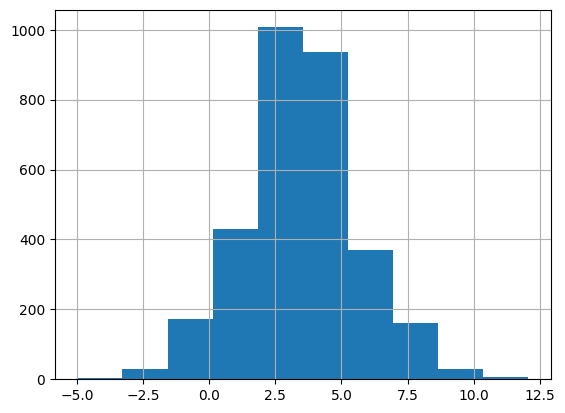

In [66]:
# df['intersects_per_population_density'].hist()
df['log_intersects_per_population_density'].hist()


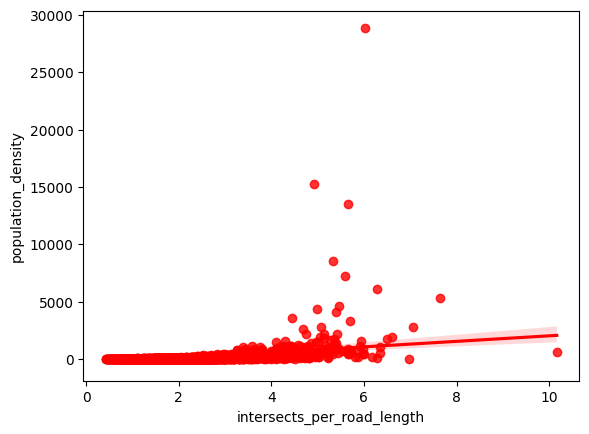

In [67]:
import seaborn as sns
x = sns.regplot(x="intersects_per_road_length", y="population_density", data=df, color='r')

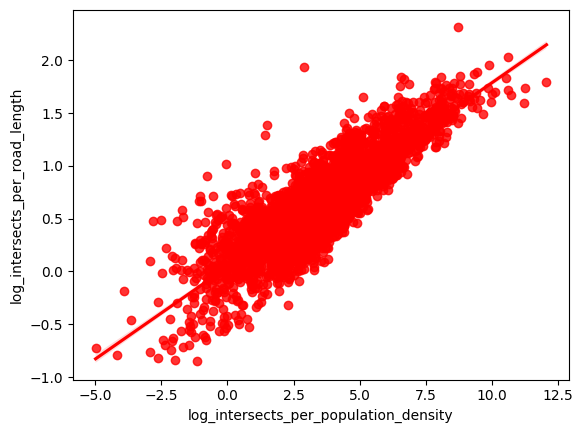

In [68]:
x = sns.regplot(x="log_intersects_per_population_density", y="log_intersects_per_road_length", data=df, color='r')


In [80]:
y = df['log_intersects_per_population_density'] # assign outcome variable, i.e. what we want to predict
# assign all other values as X-values, i.e. variables we use to predict
X = df[['gdp_2020_usd2012value',
             'median_household_income',
             'pollutant_o3',
             'emp_72251',
             'est_72251',
             'emp_813',
             'est_813',
             'emp_22',
             'est_22',
             'emp_51',
             'est_51',
             'emp_52',
             'est_52']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
# randomly assign some data to the test-set and the rest to the training-set
print(X.shape)
X_train.shape
X.head()

(3143, 13)


,gdp_2020_usd2012value,median_household_income,pollutant_o3,emp_72251,est_72251,emp_813,est_813,emp_22,est_22,emp_51,est_51,emp_52,est_52
0,1520973.0,67565.0,NaN,2238.0,86.0,579.0,69.0,165.0,8.0,103.0,11.0,367.0,72.0
1,6985901.0,71135.0,5.6000000000000001E-2,10951.0,475.0,1940.0,239.0,275.0,8.0,846.0,99.0,1695.0,373.0
2,687074.0,38866.0,NaN,571.0,41.0,122.0,28.0,88.0,5.0,42.0,10.0,145.0,42.0
3,388330.0,50907.0,NaN,232.0,15.0,53.0,21.0,15.0,3.0,26.0,5.0,63.0,16.0
4,881874.0,55203.0,NaN,705.0,45.0,282.0,39.0,NaN,NaN,47.0,9.0,215.0,48.0


In [81]:
from sklearn.model_selection import cross_val_score

In [79]:
# Lasso will give you ConvergenceWarning, ignore it
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) # Fit the training data to a lasso regression line with alpha = 0.01 and 100,000 iterations

print("LASSO REGRESSION (UNSCALED DATA)") # LASSO is L1 penalty, which adds “absolute value of magnitude” of coefficient as penalty term to the loss function. Good for feature selection when you have a lot of features.
print("Training set score: {:.3f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(lasso, X_train, y_train))))

lasso_unscaled = np.mean(cross_val_score(lasso, X_train, y_train)) # Will use later to compare results

ValueError: could not convert string to float: 'ND'